# Phys 512: Homework 5

## 1. Pseudo-Hamiltonian for the simple harmonic oscillator

### a)

The Leapfrog algorithm is:

$$v_{n+\frac{1}{2}} = v_n + a_n \frac{\Delta t}{2}$$
$$x_{n+1} = x_n + v_{n+\frac{1}{2}} \Delta t$$
$$v_{n+1} = v_{n+\frac{1}{2}} + a_{n+1} \frac{\Delta t}{2}$$

Now, from $a_n = -x_n$ we get

$$v_{n+\frac{1}{2}} = v_n -x_n \frac{\Delta t}{2}$$
$$x_{n+1} = x_n + v_n\Delta t -x_n \frac{\Delta t^2}{2} = v_n\Delta t + x_n\left(1-\frac{\Delta t^2}{2}\right)$$
$$v_{n+1} = v_n -x_n \frac{\Delta t}{2} - x_n \frac{\Delta t}{2} - v_n\frac{\Delta t^2}{2} +x_n\frac{\Delta t^3}{4} = v_n \left( 1- \frac{\Delta t^2}{2}\right) + x_n \left (\frac{\Delta t^3}{4}-\Delta t \right)$$

We can write this update as a matrix operation



$$\begin{pmatrix}
x_{n+1}  \\
v_{n+1}  
\end{pmatrix}
=\begin{pmatrix}
1 & 0 \\
-\frac{h}{2} & 1
\end{pmatrix}
\begin{pmatrix}
1 & h \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
-\frac{h^2}{2} & 1 
\end{pmatrix}
\begin{pmatrix}
x_{n}  \\
v_{n}  
\end{pmatrix}
$$
$$\begin{pmatrix}
x_{n+1}  \\
v_{n+1}  
\end{pmatrix}
=\textbf{J}\cdot \begin{pmatrix}
x_{n}  \\
v_{n}  
\end{pmatrix}
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy.matrices
# declare the step size h as a symbol
h = sympy.Symbol('h')
x = sympy.Symbol('x')
v = sympy.Symbol('v')
xv = sympy.matrices.Matrix([x, v])

For the case of the pseudo-Hamiltonian we can write the updating relation as:


$$2\tilde{H} = x^2 + \frac{v^2}{1-\frac{h^2}{4}} = 
\begin{pmatrix}
x & v 
\end{pmatrix} \begin{pmatrix}
1 & 0 \\
0 & \frac{1}{1-\frac{h^2}{4}} 
\end{pmatrix}
\begin{pmatrix}
x \\
v 
\end{pmatrix}$$

$$2\tilde{H}_{n+1} = 
\begin{pmatrix}
x_{n} & v_{n} 
\end{pmatrix} 
\textbf{J}^T\begin{pmatrix}
1 & 0 \\
0 & \frac{1}{1-\frac{h^2}{4}} 
\end{pmatrix}
\textbf{J}
\begin{pmatrix}
x_{n} \\
v_{n} 
\end{pmatrix}$$

Let's use sympy to prove that this expressions is almost constant fro every time update.

In [22]:
def J_leapfrog(h):
    a = sympy.matrices.Matrix([[1,0],[-h/2,1]])
    b = sympy.matrices.Matrix([[1,h],[0,1]])
    return a*b*a

sympy.simplify(J_leapfrog(h))
print('Determinant = ', J_leapfrog(h).det())

Determinant =  1


The determinant is 1, it indicates that we will be able to do backwards integration as we will see.

In [6]:
p = sympy.matrices.Matrix([[1,0],[0,1-sympy.Pow(h, 2)/4]])
p

Matrix([
[1,          0],
[0, 1 - h**2/4]])

In [7]:
print('\nLeapfrog 2E_n+1 = ')
f = sympy.simplify(xv.T * J_leapfrog(h).T*p * J_leapfrog(h) * xv)
f


Leapfrog 2E_n+1 = 


Matrix([[-h**8*x**2/64 + h**7*v*x/16 - h**6*v**2/16 + 3*h**6*x**2/16 - 5*h**5*v*x/8 + h**4*v**2/2 - h**4*x**2/2 + h**3*v*x - h**2*v**2/4 + v**2 + x**2]])

Terms as small as $h^8$ or $h^7$ will be almost negligible in comparison. Expressions like $\frac{h^4}{2}(v^2-x^2)$ or $h^3 vx$ or $-h^5 vx \frac{5}{8}$ will average out to zero over an orbit. This factor explains the much-improved scaling of the energy error concerning $h$. Below, we can observe their near-similarities, accounting for the variation due to the diverse powers of $h$.

In [24]:
def pseudo_H(x,v,dt):
    return 0.5*(x**2 + (v**2)/(1-(dt**2)/4))

x_test = 1
v_text = 0.6
dt_test = 0.08
print(pseudo_H(x_test, v_text, dt_test))
print( 0.5*f.subs({x: x_test, v: v_text, h: dt_test})[0])
print('error =' , H(x_test, v_text, dt_test)-0.5*f.subs({x: x_test, v: v_text, h: dt_test})[0])

0.6802884615384616
0.679858454006989
error = 0.000430007531472709


### b)
 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#define leapfrog function
def leapfrog(nsteps, dt, x0, v0):
    x = np.zeros(nsteps+1)
    v = np.zeros(nsteps+1)
    x[0] = x0
    v[0] = v0
    for i in range(1, nsteps+1):
        a = -x[i-1]
        v12 = v[i-1] + a * dt/2
        x[i] = x[i-1] + v12 * dt
        a = -x[i]
        v[i] = v12 + a * dt/2
    return x, v

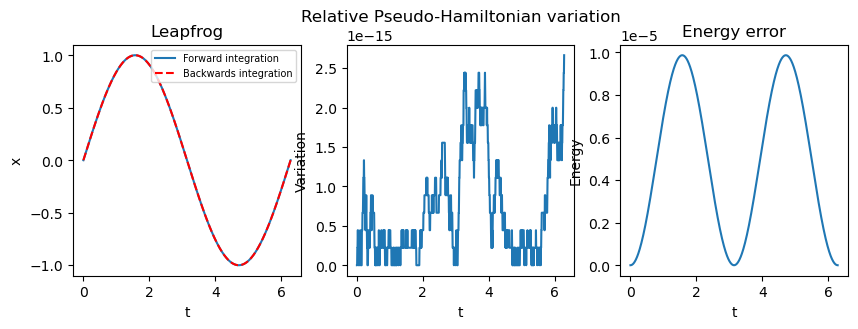

In [74]:
nsteps = 1000

dt = 2*np.pi / nsteps
t = np.arange(nsteps+1)*dt
xx, vx = leapfrog(nsteps, dt, 0, 1)
pseudo_H = 0.5*(xx**2 + (vx**2)/(1-(dt**2)/4))
H = 0.5*(xx**2+vx**2)


fig = plt.figure(figsize=(10,3))
plt.subplot(131)
plt.plot(t, xx, label = 'Forward integration')
plt.title('Leapfrog')
xx2, vx2 = leapfrog(nsteps, -dt, xx[-1], vx[-1])
plt.plot(t[::-1], xx2, 'r--', label = 'Backwards integration') # Reverse array
plt.xlabel('t')
plt.ylabel('x')
plt.legend(fontsize="7")

plt.subplot(132)
plt.title('Relative Pseudo-Hamiltonian variation')
plt.plot(t, abs(pseudo_H-pseudo_H[0])/pseudo_H[0])
plt.xlabel('t')
plt.ylabel('Variation')

plt.subplot(133)
plt.title('Energy error')
plt.plot(t, abs(H-H[0])/H[0])
plt.xlabel('t')
plt.ylabel('Energy')
plt.show()

We observe that the disparity between the pseudo-Hamiltonian at the beginning and at each subsequent step is nearly at the roundoff error level, indicating that it is indeed conserved.

### c)

From class we know that we can write
 

$$2E_{n+1} = \frac{1}{2}x_n^2 + \frac{1}{2}v_n^2=
\begin{pmatrix}
x_{n} & v_{n} 
\end{pmatrix} 
\textbf{J}^T
\textbf{J}
\begin{pmatrix}
x_{n} \\
v_{n} 
\end{pmatrix}$$

In [255]:
sympy.simplify(xv.T * J_leapfrog(h).T * J_leapfrog(h) * xv)

Matrix([[h**6*x**2/16 - h**5*v*x/4 + h**4*v**2/4 - h**4*x**2/4 + h**3*v*x/2 + v**2 + x**2]])

Notice that $E_{n+1}-E_n$ has terms with different powers of $h$
 with different combinations of $x$ and $v$. We can see that we have terms like $h^4(x^2-v^2)$or $h^3 vx$ which average to zero over half a period. This is the reason for why we see that the error scaling for a half period is around $\frac{1}{N^4}$, and for the quarter-cycle is $\frac{1}{N^2}$.

In [115]:
n_vec = 10**np.linspace(1,6,20)

E_vec14 = np.zeros_like(n_vec)
E_vec12 = np.zeros_like(n_vec)

for i, nsteps in enumerate(n_vec):
    dt = 2*np.pi / nsteps
    
    xx14, vx14 = leapfrog(int(nsteps/4)+1, dt, 0, 1)
    E14 = 0.5*(xx14**2 + vx14**2) 
    E_vec14[i] = abs(E14[0]-E14[-1])/E14[0]

    xx12, vx12 = leapfrog(int(nsteps/2)+1, dt, 0, 1)
    E12 = 0.5*(xx12**2 + vx12**2) 
    E_vec12[i] = abs(E12[0]-E12[-1])/E12[0]


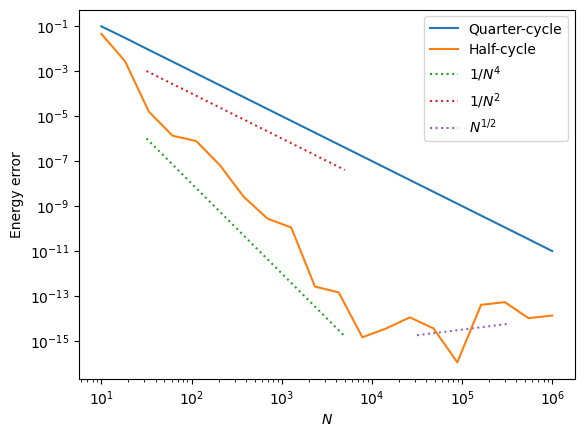

In [116]:
n_vec = 10**np.linspace(1,6,20)
plt.plot(n_vec, E_vec14, label=r'Quarter-cycle')
plt.plot(n_vec, E_vec12, label=r'Half-cycle')
n_vec = 10**np.linspace(1.5,3.7,10)
plt.plot(n_vec, 1/n_vec**4,":", label=r'$1/N^4$')
plt.plot(n_vec, 1/n_vec**2,":", label=r'$1/N^2$')
n_vec = 10**np.linspace(4.5,5.5,10)
plt.plot(n_vec, 1e-17*n_vec**0.5,":", label=r'$N^{1/2}$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'Energy error')
plt.legend()
plt.show()



We've noticed that the error scaling aligns with our expectations. Additionally, upon reaching the roundoff error within the half-cycle, we've observed Brouwer’s law, which asserts that the total error after $N$ steps scales with $\sqrt{N}$.

## 2. Eigenvalue problem for the wave on a string

### a)

For a normal mode of the string $f \propto e^{i\omega t}$, the governing equation reduces to the ODE

$$\frac{d^2f}{dx^2} = -\frac{\omega^2 \rho(x)}{T} f$$

Let’s assume that we know the frequency and want to solve for the eigenfunction $f(x)$. Set $T = 1$ for simplicity and finite-difference the equation on a grid in x:
 
$$\frac{f_{i+1}-2f_i+f_{i-1}}{(\Delta x) ^2} = -\omega^2 \rho_i f_i $$

This leads to the following matrix-vector equation:

$$\hat{A} \cdot \vec{f} = \omega^2 \hat{b} \cdot \vec{f}$$


Where $\hat{A} = -\frac{1}{\Delta x^2} 
\begin{pmatrix}
0 & 0 & 0 & 0 & \ldots \\
-1 & 2 & -1 & 0 & \ldots \\
0 & -1 & 2 & -1 & \ldots \\
\vdots & \vdots & \vdots & \vdots & \ddots \\
\end{pmatrix} $ is a tridiagonal matrix,  
and $b = \rho_i =
\begin{pmatrix}
\rho_0 & 0 & 0 &  \ldots \\
0 & \rho_1 & 0 & \ldots \\
0 & 0 & \rho_2 &  \ldots \\
\vdots & \vdots & \vdots &  \ddots \\
\end{pmatrix} $ is almost a diagonal matrix..

So:

$$
\frac{1}{\Delta x^2} 
\begin{pmatrix}
0 & 0 & 0 & 0 & \ldots \\
-1 & 2 & -1 & 0 & \ldots \\
0 & -1 & 2 & -1 & \ldots \\
\vdots & \vdots & \vdots & \vdots & \ddots \\
\end{pmatrix}
\begin{pmatrix}
f_0\\
f_1\\
f_2\\
f_3\\
\vdots\\
\end{pmatrix} = \omega^2 \begin{pmatrix}
\rho_0 & 0 & 0 &  \ldots \\
0 & \rho_1 & 0 & \ldots \\
0 & 0 & \rho_2 &  \ldots \\
\vdots & \vdots & \vdots &  \ddots \\
\end{pmatrix} 
\begin{pmatrix}
f_0\\
f_1\\
f_2\\
f_3\\
\vdots\\
\end{pmatrix} $$


Where $\rho_i$ is the density at $x = x_i$.

To make $\hat{A}$ a real tridiagonal matrix, we can exclude the boundary points where from your grid, so that your grid involves only the interior points. Then:

$$
\frac{1}{\Delta x^2} 
\begin{pmatrix}
2 & -1 & 0 & 0 & 0 & \ldots \\
-1 & 2 & -1 & 0 & 0 & \ldots \\
0 & -1 & 2 & -1 & 0 & \ldots \\
\vdots & \vdots & \vdots &  \vdots & \vdots & \ddots \\
\end{pmatrix}
\begin{pmatrix}
f_1\\
f_2\\
f_3\\
f_4\\
\vdots\\
\end{pmatrix} = \omega^2 \begin{pmatrix}
\rho_1  & 0 & 0 & 0 &  \ldots \\
0 & \rho_2  & 0 & 0 & \ldots \\
0 & 0 & \rho_3  & 0 &  \ldots \\
\vdots & \vdots & \vdots & \vdots &  \ddots \\
\end{pmatrix} 
\begin{pmatrix}
f_1\\
f_2\\
f_3\\
f_4\\
\vdots\\
\end{pmatrix} $$

Transforming it to an eigenvalue-eigenvector problem:

$$
\frac{1}{\Delta x^2}
\begin{pmatrix}
\rho_1  & 0 & 0 & 0 &  \ldots \\
0 & \rho_2  & 0 & 0 & \ldots \\
0 & 0 & \rho_3  & 0 &  \ldots \\
\vdots & \vdots & \vdots & \vdots &  \ddots \\
\end{pmatrix}  ^{-1}
\begin{pmatrix}
2 & -1 & 0 & 0 & 0 & \ldots \\
-1 & 2 & -1 & 0 & 0 & \ldots \\
0 & -1 & 2 & -1 & 0 & \ldots \\
\vdots & \vdots & \vdots &  \vdots & \vdots & \ddots \\
\end{pmatrix}
\begin{pmatrix}
f_1\\
f_2\\
f_3\\
f_4\\
\vdots\\
\end{pmatrix} = \omega^2
\begin{pmatrix}
f_1\\
f_2\\
f_3\\
f_4\\
\vdots\\
\end{pmatrix}$$


### b)

Found omega = 0.999001 pi, n = 0
Found omega = 1.998 pi, n = 1
Found omega = 2.99699 pi, n = 2
Found omega = 3.99598 pi, n = 3
Found omega = 4.99495 pi, n = 4
Found omega = 5.99392 pi, n = 5
Found omega = 6.99287 pi, n = 6
Found omega = 7.9918 pi, n = 7


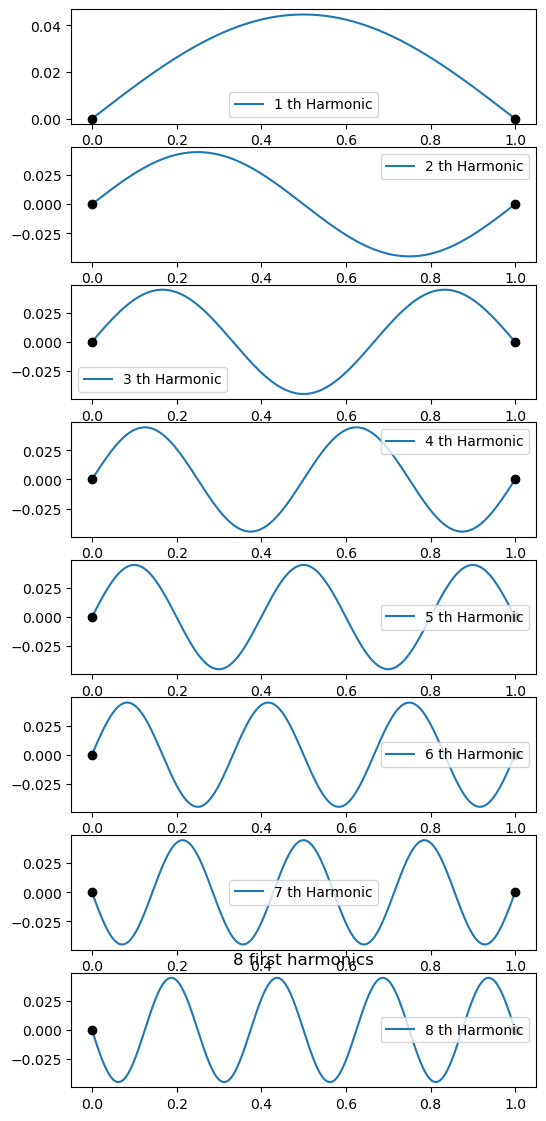

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

N = 1000
L = 1
dx = L/N

A = np.zeros((N,N))
derivative = np.array([-1,2,-1])

A[0, 0] = 2
A[0, 1] = -1
A[-1, -1] = 2
A[-1, -2] = -1

# Build the matrix
for i in range(N-2):
    row = np.zeros(i)
    row = np.append(row, derivative)
    row = np.append(row, np.zeros(N-3-i))
    A[i+1] = row

eigenvals, eigenvecs = scipy.linalg.eigh(A/(dx**2))

fig = plt.figure(figsize = (6,14))
for i in range(8):
    fi = eigenvecs[:,i]
    n = ((fi[1:-1] * fi[:-2]) < 0).sum()
    print("Found omega = %lg pi, n = %d" % (np.sqrt(eigenvals[i])/np.pi,n))
    plt.subplot(8,1,1+i)
    plt.plot(np.array(range(N))*dx, fi, label = '%lg th Harmonic' %(i+1))
    plt.plot((0,1),(0,0), 'ko')
    plt.legend()
plt.title('8 first harmonics')
plt.show()

The plots are clearly the same as we did with the shooting method. We can compare their frequencies with ours: $\omega_0 = 1.00001 \pi$ , $\omega_1 = 1.00002 \pi$, $\omega_3 = 3.00003 \pi$, $\omega_4 = 4.00004 \pi$ $\omega_5 = 5.00005$

We can consider that we have obtained the same results, with an error up to $0.001$.

Now let's apply the variating density.

Found omega = 0.492561 pi, n = 0
Found omega = 1.01579 pi, n = 1
Found omega = 1.53219 pi, n = 2
Found omega = 2.04538 pi, n = 3
Found omega = 2.55711 pi, n = 4
Found omega = 3.06821 pi, n = 5
Found omega = 3.57904 pi, n = 6
Found omega = 4.08978 pi, n = 7


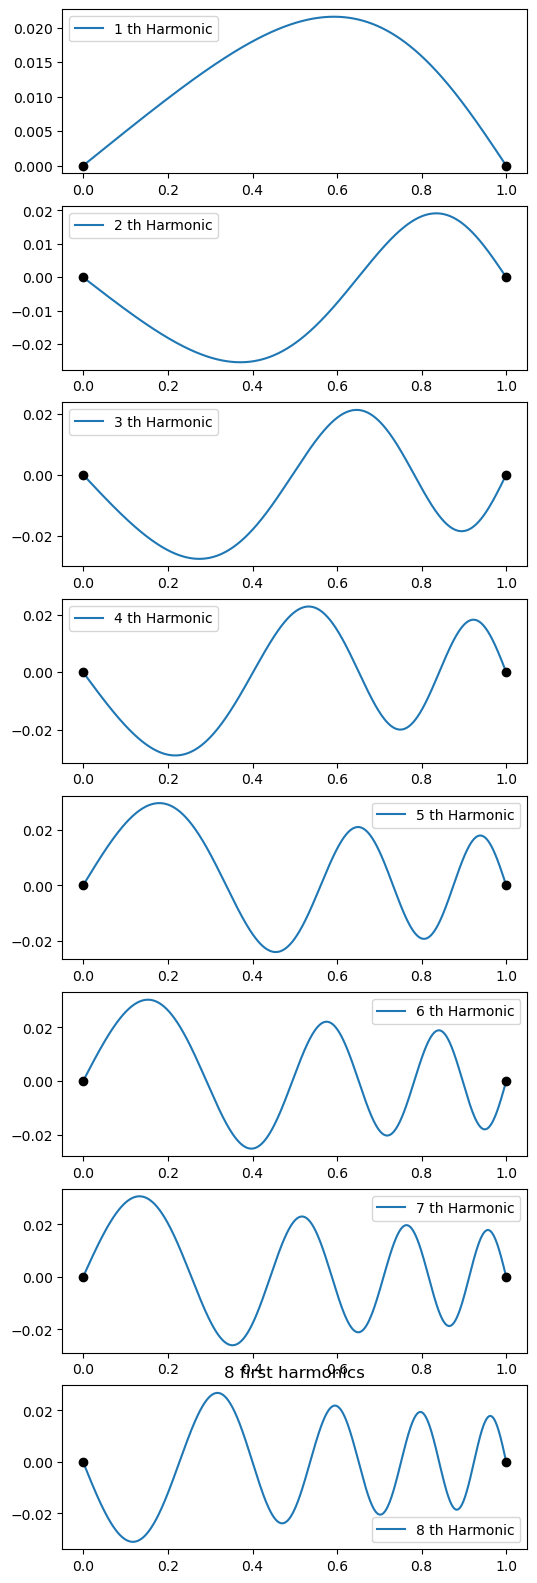

In [22]:
def rho(x):
    rho = 1.0 + 10*x**2
    return rho

b = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i == j:
            b[i][j] = rho((i)*dx)
        else:
            b[i][j] = 0


eigenvals, eigenvecs = scipy.linalg.eigh(A/(dx**2), b)

fig = plt.figure(figsize = (6,20))
for i in range(8):
    fi = eigenvecs[:,i]
    n = ((fi[1:-1] * fi[:-2]) < 0).sum()
    print("Found omega = %lg pi, n = %d" % (np.sqrt(eigenvals[i])/np.pi,n))
    plt.subplot(8,1,1+i)
    plt.plot(np.array(range(N))*dx, fi, label = '%lg th Harmonic' %(i+1))
    plt.plot((0,1),(0,0), 'ko')
    plt.legend()
plt.title('8 first harmonics')
plt.show()

Again our results are very similar to what we have achived with the shooting method. We can compare their frequencies with ours: $\omega_0 = 0.493438  \pi$ , $\omega_1 = 1.01755  \pi$, $\omega_3 = 1.53483 \pi$, $\omega_4 = 2.0489 \pi$ $\omega_5 = 2.56151$, $\omega_6 = 3.0735$, $\omega_7 = 3.58524$.

We can consider that we have obtained very similar results, with a difference of $0.01$, higher than with a constant denstity.

## 3. Leapfrogging an electromagnetic wave

## a)

In [162]:
from matplotlib.animation import FuncAnimation
from IPython import display

N = 1000
L = 10

T = 1000

dx = L/(N-1)
dt = 0.01

dt/dx


0.999

Each step:
$$B_i^{n+1} = B_i^{n-1} - \frac{\Delta t}{\Delta x} \left( E_{i+1}^n- E_{i-1}^n \right)$$

$$E_i^{n+1} = E_i^{n-1} - \frac{\Delta t}{\Delta x} \left( B_{i+1}^n- B_{i-1}^n \right) \frac{1}{n_i^2}$$

In [163]:
E_field = np.zeros(N)
B_field = np.zeros(N)
x = np.linspace(0,L,N)

n_1 = 1.1
n_2 = 1.5

mean = L/2
sigma = 0.5

E0 = np.exp(-(x-mean)**2/(2*sigma**2))
B0 = -E0

E = E0
B = B0

B_n = B0 
B_n1 = B0
E_n = E0
E_n1 = E0

n = 1


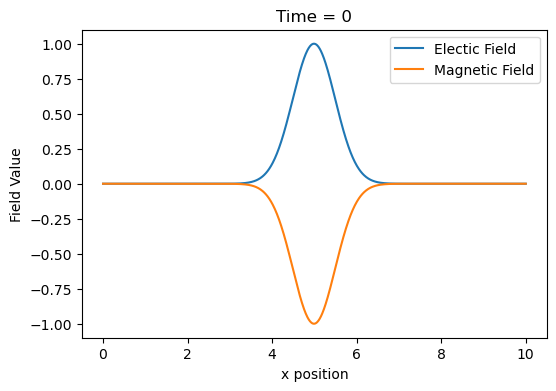

In [167]:
Figure = plt.figure(figsize=(6, 4))

def Animation(frames):
    global E0
    global B0
    global B_n 
    global B_n1
    global E_n
    global E_n1
    if frames == 0:
        B = B_n1 - dt/dx * (np.roll(E_n, -1) - np.roll(E_n, 1))
        E = E_n1 - dt/dx * (np.roll(B_n,-1)- np.roll(B_n,1))/(n**2)
        B_n = B 
        B_n1 = B0
        E_n = E
        E_n1 = E0
    else:
        B = B_n1 - dt/dx * (np.roll(E_n, -1) - np.roll(E_n, 1))
        E = E_n1 - dt/dx * (np.roll(B_n,-1)- np.roll(B_n,1))/(n**2)
        B_n1 = B_n
        B_n = B 
        E_n1 = E_n
        E_n = E
    plt.clf()
    plt.title('Time = %lg' % (frames*dt))
    plt.plot(x, E, label=r'Electic Field')
    plt.plot(x, B, label=r'Magnetic Field')
    plt.xlabel('x position')
    plt.ylabel('Field Value')
    plt.legend()

    
    
anim_created = FuncAnimation(Figure, Animation, frames = T, interval=150)

video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html) 

We observe their movement towards the left. When set with identical initial distributions, the movement reverses to the right. This shift occurs due to the opposite sign relation between the previous value and the new one. With the spatial and time steps we've chosen, there's no alteration in the shape of the Gaussians; only a very slight numerical diffusion is noticeable towards the end.

## b)

This time, instead of doing an animation, which takes a lot of time, we will plot the distribution of the field for different times.

In [271]:
from matplotlib.animation import FuncAnimation
from IPython import display

N = 1000
L = 10

T = 5000

dx = L/(N-1)
dt = 0.001

dt/dx

0.0999

In [272]:
E_field = np.zeros(N)
B_field = np.zeros(N)
x = np.linspace(0,L,N)

n_1 = 1.1
n_2 = 1.5

mean = L/4
sigma = 0.35

E0 = np.exp(-(x-mean)**2/(2*sigma**2))
B0 = E0

E = E0
B = B0

B_n = B0 
B_n1 = B0
E_n = E0
E_n1 = E0

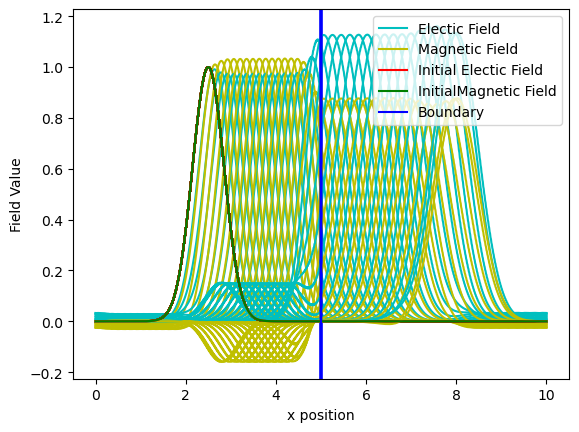

In [273]:
for i in range(T):
    if i == 0:
        B = B_n1 - dt/dx * (np.roll(E_n, -1) - np.roll(E_n, 1))
        E = E_n1 - dt/dx * (np.roll(B_n,-1)- np.roll(B_n,1))/(n_1**2)
        B_n = B 
        B_n1 = B0
        E_n = E
        E_n1 = E0
    else:
        B = B_n1 - dt/dx * (np.roll(E_n, -1) - np.roll(E_n, 1))
        E[int(N/2):] = (E_n1[int(N/2):] - dt/dx * (np.roll(B_n,-1)[int(N/2):]- np.roll(B_n,1)[int(N/2):])/(n_1**2))
        E[:int(N/2)] = (E_n1[:int(N/2)] - dt/dx * (np.roll(B_n,-1)[:int(N/2)]- np.roll(B_n,1)[:int(N/2)])/(n_2**2))
        B_n1 = B_n
        B_n = B 
        E_n1 = E_n
        E_n = E
    if i % 150 == 0:
        plt.plot(x, E, color ='c')
        plt.plot(x, B,  color ='y')
        plt.plot(x, E0,  color ='r')
        plt.plot(x, B0,  color ='g')
        plt.axvline(x = 5, color = 'b')
        plt.xlabel('x position')
        plt.ylabel('Field Value')
        
plt.plot(x, E, label=r'Electic Field', color ='c')
plt.plot(x, B, label=r'Magnetic Field', color ='y')
plt.plot(x, E0, label=r'Initial Electic Field', color ='r')
plt.plot(x, B0, label=r'InitialMagnetic Field', color ='g')     
plt.axvline(x = 5, color = 'b', label = 'Boundary')
plt.legend()
plt.show()

We can observe changes in the field intensity after transitioning into the new region, along with the backward-traveling pulse where the electric field maintains its orientation, while the magnetic field undergoes a phase change of $\pi$. 

Given the reflection coefficient $r = \frac{n_2-n_1}{n_2+n_1} = 0.16$ and the transmission coefficient $t = \frac{2 n_1}{n_2+n_1} = 0.60$, , we might expect a higher reduction in the amplitude of the transmitted magnetic field. However, the reflected fields align with our expectations.